## 패키지 불러오기

In [1]:
from pandas import DataFrame,read_csv,read_excel,merge,melt,pivot_table
import numpy
from matplotlib import pyplot as plt
import seaborn as sb
import sys
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from factor_analyzer.factor_analyzer import calculate_kmo

## 폰트 세팅

In [2]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.unicode_minus"] = False

### 데이터 불러오기

In [3]:
origin=read_excel('행정동병합테스트2.xlsx')
origin.head()

,시도명,시군구코드,시군구명,행정동코드,읍면동명,면적 (k㎡),서울시전체면적_대비_구성비 (%),인구_수,아동인구(0~9세),65세이상인구,...,사업체_수,개소 (공영+민영),면수 (공영+민영),행정동별_공원수,하천및한강여부,사회복지시설_수,공공체육시설_수,문화시설_수,학교_수,보육시설
0,서울특별시,11110,종로구,1111051500,청운효자동,2.57,0.42,11818,612,2154,...,992,668,4592,2,0,5,10,6,8,4
1,서울특별시,11110,종로구,1111053000,사직동,1.23,0.20,9355,488,1808,...,3532,362,12605,3,0,1,8,13,2,11
2,서울특별시,11110,종로구,1111054000,삼청동,1.49,0.25,2642,108,626,...,708,343,2237,1,0,0,2,31,2,3
3,서울특별시,11110,종로구,1111055000,부암동,2.27,0.38,9536,385,1814,...,558,596,3533,1,1,4,5,5,4,3
4,서울특별시,11110,종로구,1111056000,평창동,8.87,1.47,17858,1033,3495,...,747,1617,9390,0,1,11,5,11,4,3


### 데이터타입 확인

In [4]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   시도명                 426 non-null    object 
 1   시군구코드               426 non-null    int64  
 2   시군구명                426 non-null    object 
 3   행정동코드               426 non-null    int64  
 4   읍면동명                426 non-null    object 
 5   면적 (k㎡)             426 non-null    float64
 6   서울시전체면적_대비_구성비 (%)  426 non-null    float64
 7   인구_수                426 non-null    int64  
 8   아동인구(0~9세)          426 non-null    int64  
 9   65세이상인구             426 non-null    int64  
 10  장애인_인구              426 non-null    int64  
 11  인구밀도(1k㎡당)          426 non-null    float64
 12  행정동내_지하철역_수         426 non-null    int64  
 13  행정동내_의료기관           426 non-null    int64  
 14  사업체_수               426 non-null    int64  
 15  개소 (공영+민영)          426 non-null    int64  
 16  면수 (공영+민

### 결측치 확인

In [5]:
origin.isna().sum()

시도명                   0
시군구코드                 0
시군구명                  0
행정동코드                 0
읍면동명                  0
면적 (k㎡)               0
서울시전체면적_대비_구성비 (%)    0
인구_수                  0
아동인구(0~9세)            0
65세이상인구               0
장애인_인구                0
인구밀도(1k㎡당)            0
행정동내_지하철역_수           0
행정동내_의료기관             0
사업체_수                 0
개소 (공영+민영)            0
면수 (공영+민영)            0
행정동별_공원수              0
하천및한강여부               0
사회복지시설_수              0
공공체육시설_수              0
문화시설_수                0
학교_수                  0
보육시설                  0
dtype: int64

### 컬럼 전체 확인

In [6]:
origin.columns

Index(['시도명', '시군구코드', '시군구명', '행정동코드', '읍면동명', '면적 (k㎡)',
       '서울시전체면적_대비_구성비 (%)', '인구_수', '아동인구(0~9세)', '65세이상인구', '장애인_인구',
       '인구밀도(1k㎡당)', '행정동내_지하철역_수', '행정동내_의료기관', '사업체_수', '개소 (공영+민영)',
       '면수 (공영+민영)', '행정동별_공원수', '하천및한강여부', '사회복지시설_수', '공공체육시설_수', '문화시설_수',
       '학교_수', '보육시설'],
      dtype='object')

### 데이터프레임 복사

In [7]:
df1=origin.copy()

### 기초 통계량 확인

In [8]:
df1.describe()

,시군구코드,행정동코드,면적 (k㎡),서울시전체면적_대비_구성비 (%),인구_수,아동인구(0~9세),65세이상인구,장애인_인구,인구밀도(1k㎡당),행정동내_지하철역_수,...,사업체_수,개소 (공영+민영),면수 (공영+민영),행정동별_공원수,하천및한강여부,사회복지시설_수,공공체육시설_수,문화시설_수,학교_수,보육시설
count,426.000000,4.260000e+02,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,...,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,11433.521127,1.143415e+09,1.420751,0.234836,22697.406103,1247.492958,3914.659624,919.990610,23034.273976,0.741784,...,1907.269953,720.028169,10567.781690,0.302817,0.776995,5.784038,2.978873,1.870892,3.488263,11.061033
std,192.086184,1.920776e+07,1.569773,0.259592,9009.117334,773.747204,1595.815022,490.919804,11427.588087,0.991251,...,1909.412343,527.175416,7181.650766,0.565554,0.416751,4.523958,4.145816,6.832431,2.785019,6.360617
min,11110.000000,1.111052e+09,0.230000,0.040000,73.000000,1.000000,11.000000,3.000000,79.347826,0.000000,...,0.000000,9.000000,193.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11260.000000,1.126066e+09,0.670000,0.110000,16829.750000,717.250000,2844.750000,562.750000,13944.578947,0.000000,...,935.500000,299.000000,6102.500000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,7.000000
50%,11440.000000,1.144064e+09,0.975000,0.160000,22067.000000,1061.500000,3717.000000,817.500000,23208.949275,0.000000,...,1396.000000,619.000000,8621.500000,0.000000,1.000000,5.000000,1.000000,1.000000,3.000000,10.000000
75%,11612.500000,1.161306e+09,1.490000,0.250000,27773.750000,1594.750000,4842.750000,1215.500000,31624.963235,1.000000,...,2085.000000,1066.250000,13132.500000,1.000000,1.000000,8.000000,4.000000,2.000000,5.000000,14.000000
max,11740.000000,1.174070e+09,12.680000,2.100000,55034.000000,6505.000000,8750.000000,3649.000000,56905.000000,7.000000,...,15691.000000,3162.000000,53019.000000,3.000000,1.000000,27.000000,39.000000,108.000000,15.000000,39.000000


### KMO 검정을 위해(각 변수별 상관관계 있는지) 필요없는 변수 제외

In [9]:
df2=df1.drop(['시도명','시군구코드','시군구명','행정동코드','읍면동명'],axis=1)
df2

,면적 (k㎡),서울시전체면적_대비_구성비 (%),인구_수,아동인구(0~9세),65세이상인구,장애인_인구,인구밀도(1k㎡당),행정동내_지하철역_수,행정동내_의료기관,사업체_수,개소 (공영+민영),면수 (공영+민영),행정동별_공원수,하천및한강여부,사회복지시설_수,공공체육시설_수,문화시설_수,학교_수,보육시설
0,2.57,0.42,11818,612,2154,437,4598.443580,0,75,992,668,4592,2,0,5,10,6,8,4
1,1.23,0.20,9355,488,1808,267,7605.691057,2,11,3532,362,12605,3,0,1,8,13,2,11
2,1.49,0.25,2642,108,626,110,1773.154362,0,4,708,343,2237,1,0,0,2,31,2,3
3,2.27,0.38,9536,385,1814,311,4200.881057,0,15,558,596,3533,1,1,4,5,5,4,3
4,8.87,1.47,17858,1033,3495,491,2013.303269,0,6,747,1617,9390,0,1,11,5,11,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0.67,0.11,23528,897,4469,1075,35116.417910,3,4,1889,1278,7869,0,1,6,0,2,0,9
422,0.71,0.12,23071,1024,4098,913,32494.366197,1,80,2451,1241,10656,0,1,6,0,1,0,11
423,1.61,0.27,45374,2061,8478,1988,28182.608696,1,103,5153,1734,17661,1,0,11,1,1,4,17
424,0.92,0.15,73,1,11,3,79.347826,1,1,15,16,193,0,1,0,0,0,4,0


### kmo 검정 결과 1개의 변수를 제외한 나머지는 전부 0.6 이상 나오며 전체 평균은 0.75로 전부 사용가능한 것으로 판단

In [10]:
kmo_per_variable, kmo_total = calculate_kmo(df2)
print("KMO per variable:", kmo_per_variable)
print("KMO total:", kmo_total)

KMO per variable: [0.68541    0.68602157 0.76690132 0.76273655 0.77083743 0.75545551
 0.76482554 0.63556459 0.64981137 0.54032657 0.67951858 0.78072518
 0.87729048 0.61494395 0.85261054 0.85884632 0.68856975 0.7581776
 0.86346529]
KMO total: 0.7517916160617781


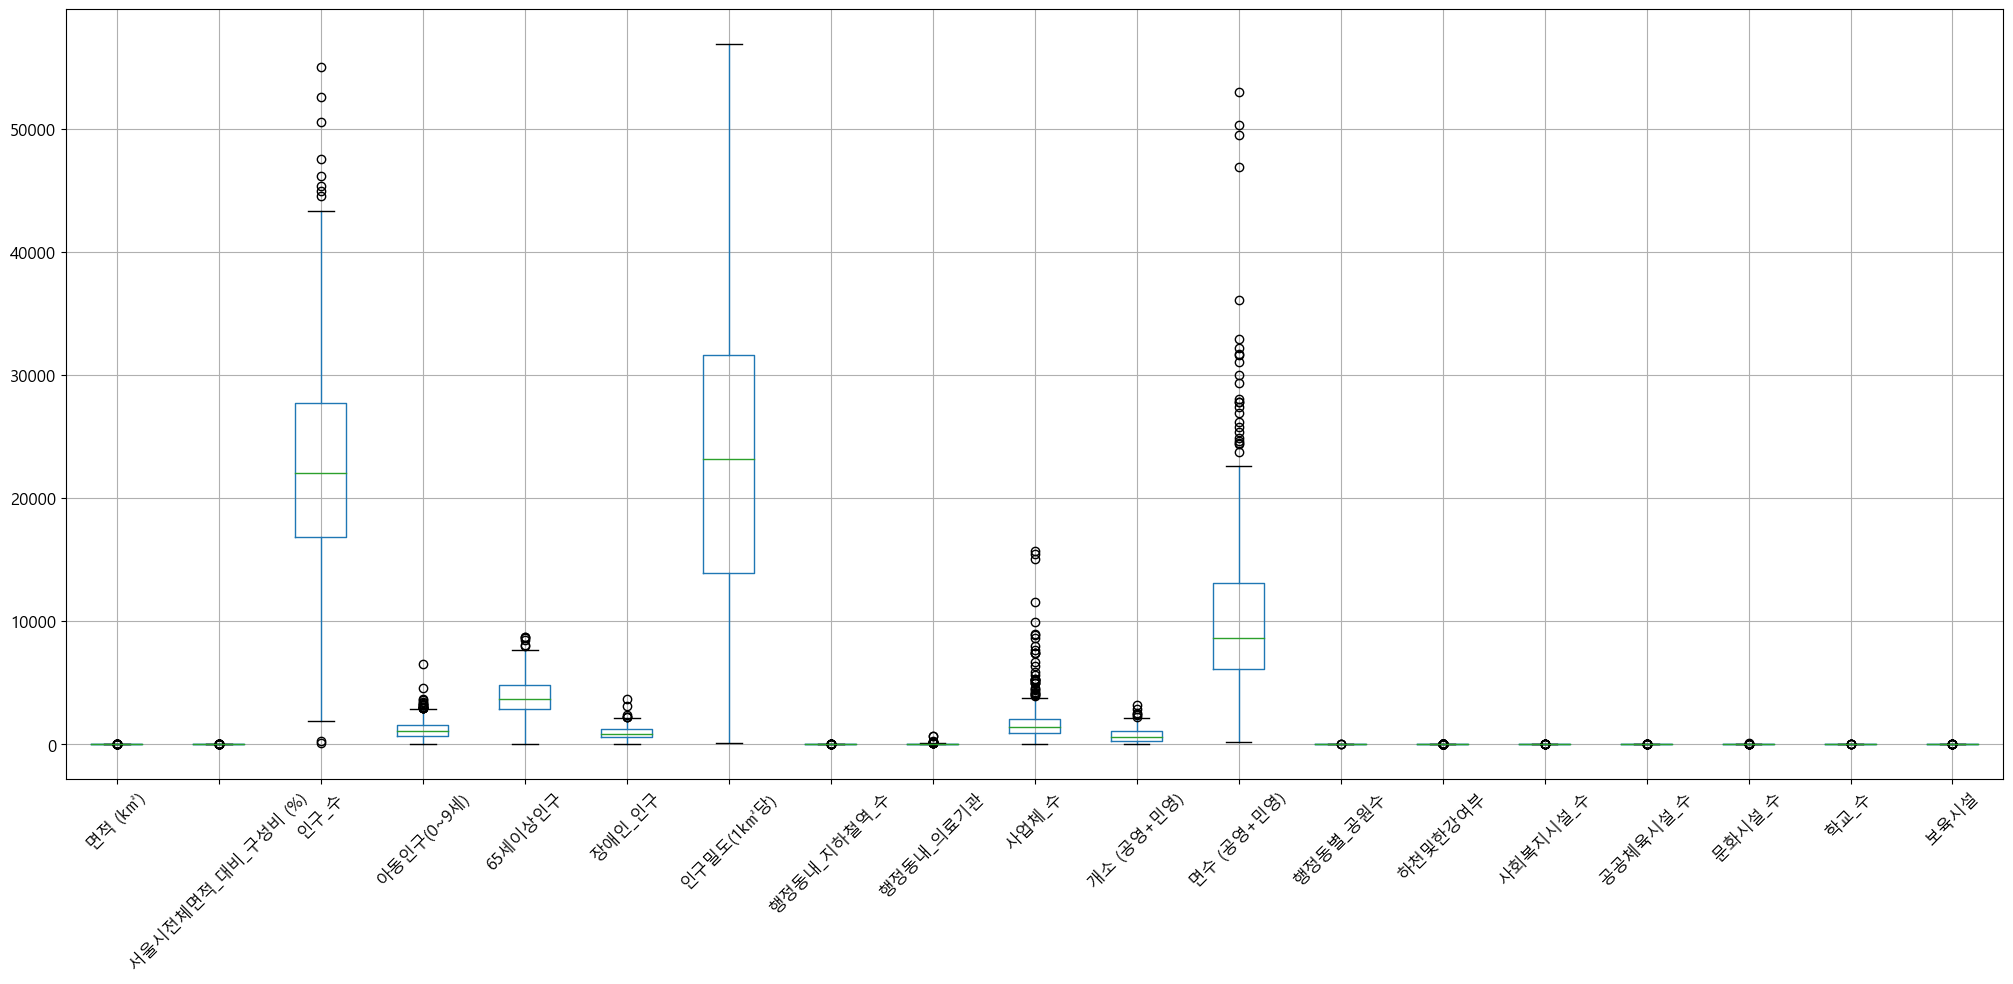

In [11]:
plt.figure(figsize=(25,10))
df2.boxplot()
plt.xticks(rotation=45)
plt.show()
plt.close()

> 표준화 필요, 이상치로 의심되는 값이 존재하지만 실제 기관에서 조사/발췌한 내용인 만큼 이상치가 아닌 정상 값으로 판단해 이상치 처리는 반려하기로 결정.

### 상관관계 확인을 위해 히트맵으로 시각화

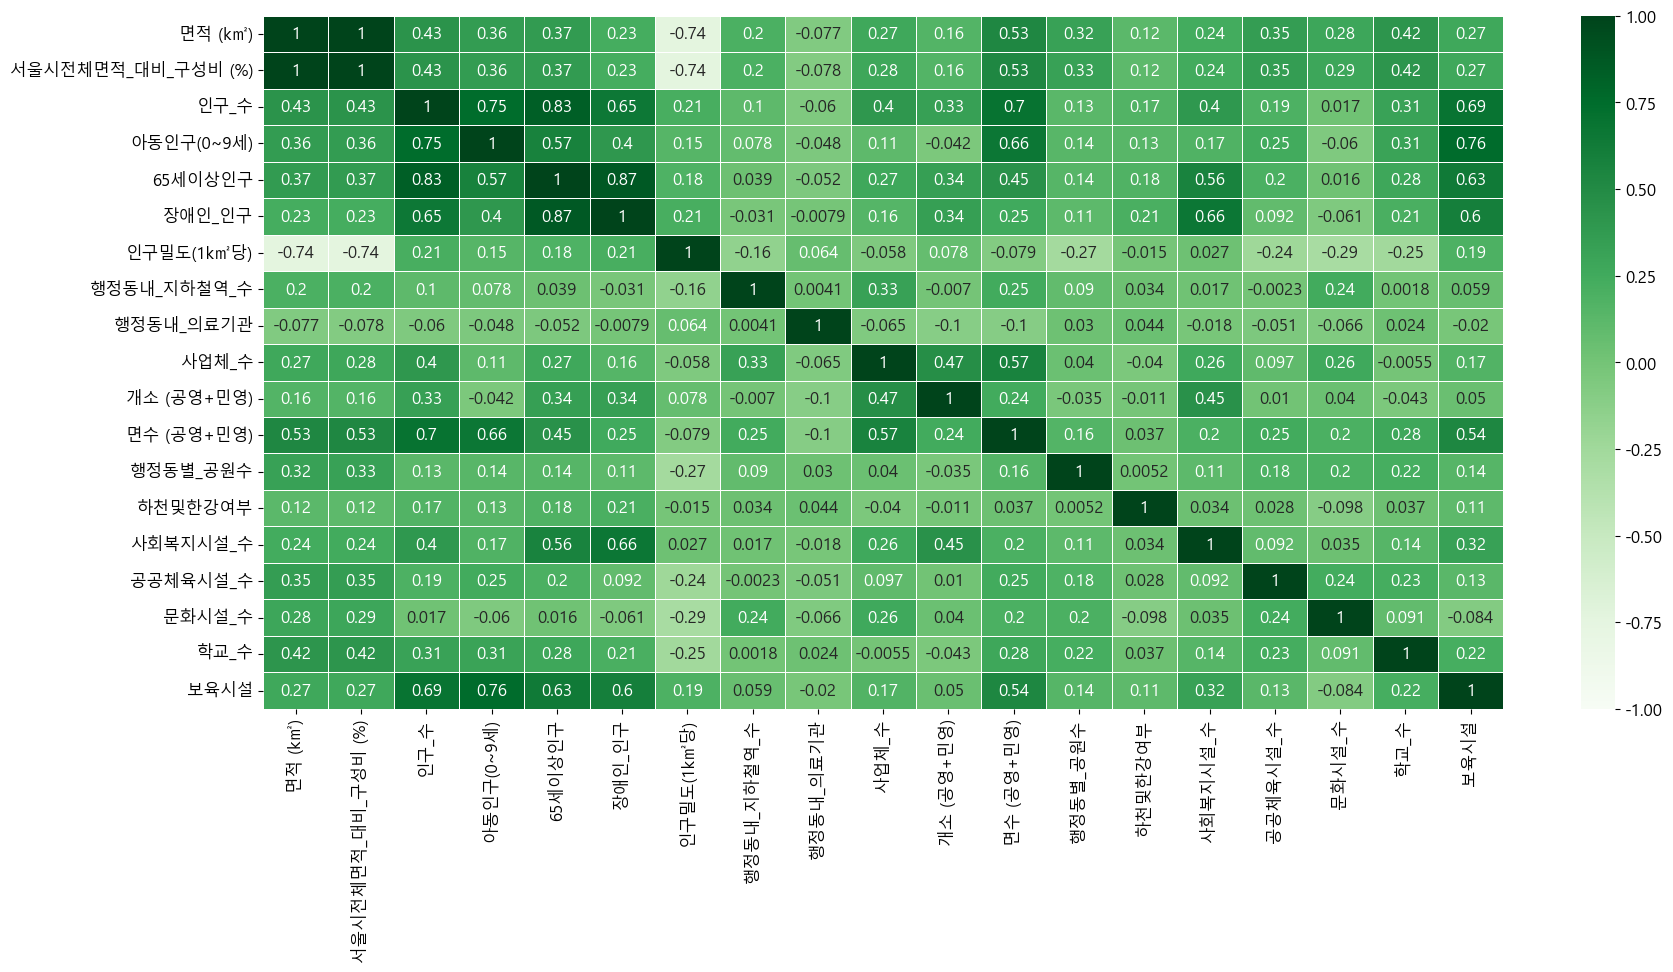

In [12]:
corr = df2.corr(method='spearman')
corr.head()
plt.rcParams["figure.figsize"] = (20,9)
sb.heatmap(corr, annot = True, cmap = 'Greens', vmin = -1, vmax=1, linewidths=.5)
plt.show()
plt.close()

### 도시기본계획에서 가장 중요한 요소로 선정된 것은 역세권.<br/> 즉, 해당 지역에 지하철역 수가 가장 큰 영향을 미칠것으로 가정하고 지하철역 수를 종속변수로 채택하여 회귀분석으로 진행해봄

In [20]:
df2.columns

Index(['면적 (k㎡)', '서울시전체면적_대비_구성비 (%)', '인구_수', '아동인구(0~9세)', '65세이상인구',
       '장애인_인구', '인구밀도(1k㎡당)', '행정동내_지하철역_수', '행정동내_의료기관', '사업체_수',
       '개소 (공영+민영)', '면수 (공영+민영)', '행정동별_공원수', '하천및한강여부', '사회복지시설_수',
       '공공체육시설_수', '문화시설_수', '학교_수', '보육시설'],
      dtype='object')

In [16]:
tmp = df2[['행정동내_지하철역_수']]
tmp

,행정동내_지하철역_수
0,0
1,2
2,0
3,0
4,0
...,...
421,3
422,1
423,1
424,1


In [17]:
kmeans=KMeans(n_clusters=4,n_init=4)
kmeans.fit(tmp)
labels=kmeans.predict(tmp)
labels

array([1, 0, 1, 1, 1, 1, 1, 1, 3, 0, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 0, 2,
       0, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 3, 1, 1, 2,
       1, 0, 2, 1, 1, 1, 2, 2, 0, 2, 2, 1, 2, 2, 0, 2, 1, 1, 1, 1, 0, 2,
       1, 0, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 2, 1,
       2, 1, 0, 1, 2, 2, 1, 2, 1, 2, 1, 2, 3, 1, 2, 0, 2, 1, 0, 1, 1, 2,
       1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       2, 1, 1, 0, 2, 2, 0, 2, 1, 2, 1, 1, 1, 2, 2, 0, 2, 2, 1, 2, 1, 1,
       0, 2, 0, 1, 1, 2, 0, 1, 1, 1, 1, 2, 2, 0, 0, 2, 2, 1, 0, 0, 1, 1,
       2, 2, 1, 1, 2, 1, 1, 1, 0, 2, 2, 2, 0, 1, 1, 0, 3, 2, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 0, 1, 2, 2, 0, 1, 2, 0,
       2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 0, 1, 0, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       2, 0, 0, 0, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2,

In [18]:
tmp['labels']=labels
tmp

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21500\3894159881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['labels']=labels


,행정동내_지하철역_수,labels
0,0,1
1,2,0
2,0,1
3,0,1
4,0,1
...,...,...
421,3,0
422,1,2
423,1,2
424,1,2


In [19]:
plt.figure(figsize=(10,5))
sb.scatterplot(data=tmp,x='면적 (k㎡)',y='문화시설_수',hue='labels')
plt.title("game plater data")
plt.xlabel('면적')
plt.ylabel('문화시설 수')
plt.grid()
plt.show()
plt.close()

ValueError: Could not interpret value `면적 (k㎡)` for parameter `x`

<Figure size 1000x500 with 0 Axes>

In [36]:
scaler=MinMaxScaler()
scaler.fit(tmp)
n_data=scaler.transform(tmp)
print('각 열의 평균: ',n_data[:,0].mean(),n_data[:,1].mean())
print('각 열의 최소값: ',n_data[:,0].min(),n_data[:,1].min())
print('각 열의 최대값: ',n_data[:,0].max(),n_data[:,1].max())

각 열의 평균:  0.10596914822266934 0.08372456964006261
각 열의 최소값:  0.0 0.0
각 열의 최대값:  1.0 1.0


In [37]:
n_data

array([[0.        , 0.11111111, 0.125     , ..., 0.05555556, 0.53333333,
        0.66666667],
       [0.28571429, 0.        , 0.125     , ..., 0.12037037, 0.13333333,
        0.66666667],
       [0.        , 0.        , 0.        , ..., 0.28703704, 0.13333333,
        0.66666667],
       ...,
       [0.14285714, 0.66666667, 0.        , ..., 0.00925926, 0.26666667,
        1.        ],
       [0.14285714, 0.        , 0.        , ..., 0.        , 0.26666667,
        0.66666667],
       [0.14285714, 0.11111111, 0.        , ..., 0.        , 0.53333333,
        0.33333333]])

In [38]:
iner=[]

for k in range(2,11):
    kmeans=KMeans(n_clusters=10)
    kmeans.fit(n_data)
    iner.append(kmeans.inertia_)
iner

c:\Users\kiman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\kiman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\kiman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\kiman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\

[45.223419443667716,
 44.38133524810042,
 44.28052586544742,
 44.93019473779903,
 44.90789011646635,
 44.47046394232013,
 44.78935785104585,
 45.00963717950499,
 44.65584330998646]

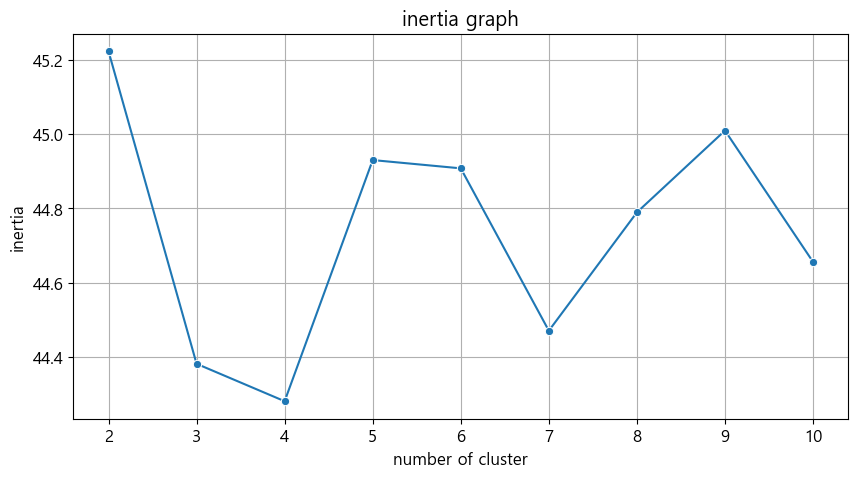

In [39]:
plt.figure(figsize=(10,5))
sb.lineplot(x=range(2,11),y=iner,marker='o')
plt.title('inertia graph')
plt.xlabel('number of cluster')
plt.ylabel('inertia')
plt.grid()
plt.show()
plt.close()

### 하천 및 한강 여부가 범주형이기 때문에 명목형으로 변환해야한다.

In [ ]:
df=origin.copy()
mapping = {'유': 1, '무': 0}
df['근처_하천여부'] = df['근처_하천여부'].replace(mapping)
df['근처_한강여부'] = df['근처_한강여부'].replace(mapping)

In [ ]:
df1=df.drop(['자치구','해당역(호선)','행정구코드','비율(%)','구성비 (%)'],axis=1)
df1.dtypes
corr = df1.corr(method='spearman')
corr.head()

,행정구 내 지역생활권 수,면적(km²),인구수,역개수,공원수,장애인시설수,체육시설수,병원및보건소_수,학교_수,사업체수,...,경제환경,사회환경,교육환경,근처_하천여부,근처_한강여부,20~30년미만 주거시설_총합,30년이상 주거시설_총합,지역내총생산(당해년가격) (백만원),1인당 지역내총생산 (천원),수준지수(서울특별시=100) (%)
행정구 내 지역생활권 수,1.000000,0.669376,0.800341,0.285354,0.286575,0.534936,0.553070,0.466440,0.782048,0.041634,...,0.223125,0.367975,0.136755,-0.055656,0.311220,0.649974,0.643103,-0.017381,-0.211808,-0.211808
면적(km²),0.669376,1.000000,0.708462,0.295013,0.306791,0.609176,0.571264,0.604252,0.686803,0.256154,...,0.371538,0.519431,0.389606,0.090784,0.279369,0.360769,0.533077,0.120769,-0.018462,-0.018462
인구수,0.800341,0.708462,1.000000,0.169844,0.241300,0.577847,0.706674,0.770276,0.948827,0.213846,...,0.193077,0.563678,0.141290,0.045392,0.201146,0.740769,0.598462,-0.040769,-0.254615,-0.254615
역개수,0.285354,0.295013,0.169844,1.000000,0.466076,0.238964,-0.119415,0.109995,0.192063,0.564222,...,0.311188,0.213254,0.449499,0.007576,0.520327,-0.048142,-0.022723,0.556904,0.511458,0.511458
공원수,0.286575,0.306791,0.241300,0.466076,1.000000,0.304792,-0.062384,0.387222,0.280390,0.408144,...,0.118896,0.249973,0.208756,0.046007,0.283151,0.096286,-0.017932,0.316926,0.210894,0.210894


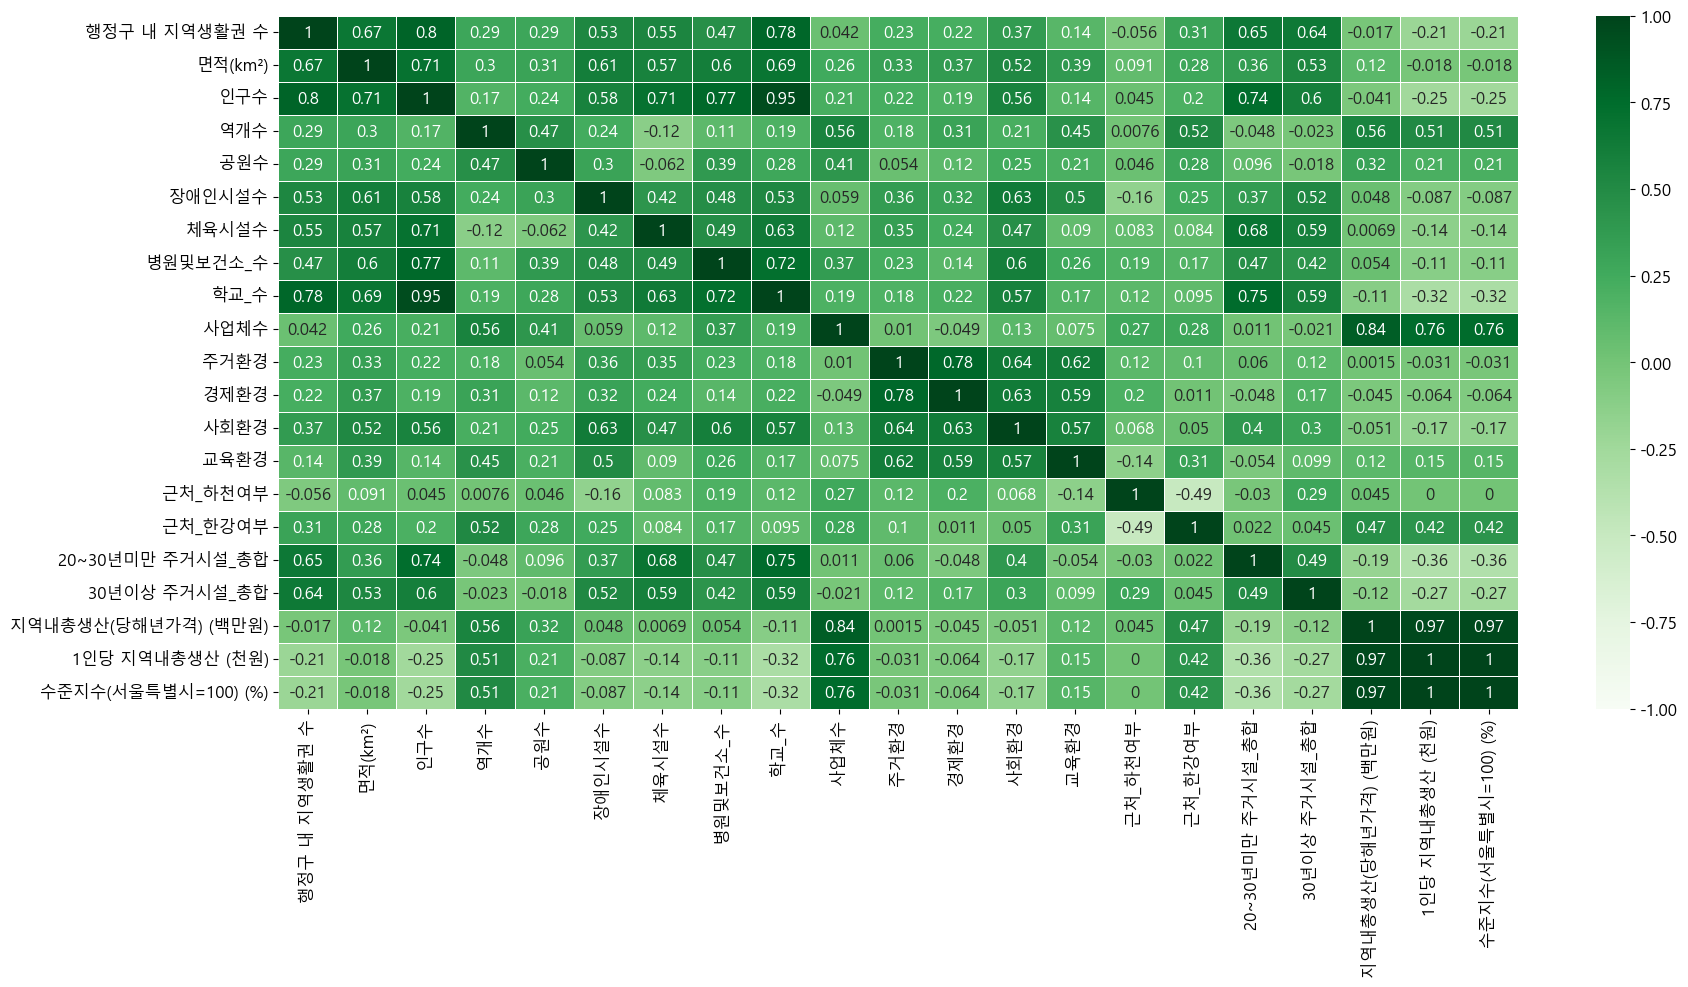

In [ ]:
plt.rcParams["figure.figsize"] = (20,9)
sb.heatmap(corr, annot = True, cmap = 'Greens', vmin = -1, vmax=1, linewidths=.5)
plt.show()
plt.close()

1. 지역생활권 수에 가장 영향을 끼치는 변수는 (1)인구수 (2)학교수 (3)면적,20~30년 주거시설, 30년이상 주거시설
2. 